В задаче нужно найти оптимальное управление, с помощью уравнения Беллмана. Т.е. нужно найти функцию $V(x,t)$ в уравнении:
$$\frac{\partial V}{\partial t} + {\underset{u(t)}{max}}[I(x,u,t)+\frac{\partial V}{\partial x}*f(x,u,t)]=0$$
$$V(x(t_1),t_1)=0$$
В данной задаче $\frac{\partial V}{\partial t} = 0$ так как время не фиксированное

При
$$u(t) \in U \;\;\;\;\;\;\; \dot{x} = f(x,u,t)$$

Так как это задача о минимальном времени перехода, то функционал будет иметь вид:
$$-\int\limits_{t_0}^{t_1}1dt → {\underset{u}{max}}$$

Динамика системы описывается следующими уравнениями:
$$\dot{x_1} = W*\cos{x_3}$$
$$\dot{x_2} = W*\sin{x_3}$$
$$\dot{x_3} = u$$

Величина скорости имеет вид:
$$W=W_0*\sqrt{1+(\frac{x_2}{a})^{2}}$$

Тогда найдем структуру оптимального уравнения, из выражения в квадратных скобках, в уравнении Беллмана:
$$-1+\frac{\partial V}{\partial x_1}*W\cos{x_3} + \frac{\partial V}{\partial x_2}*W\sin{x_3}+\frac{\partial V}{\partial x_3}*u = 0$$

Найдем структуру оптимального управления из условия максимума в уравнении Беллмана, тогда получим:
$$u=u_{max}*sign{\frac{\partial V}{\partial x_3}} $$

В нашей задаче управление это производная от угла поворота, т.е. $u$ может принимать только значения -1,0,1.

Подставим тогда $u$ в уравнение выше, получим:
$$-1+\frac{\partial V}{\partial x_1}*W\cos{x_3} + \frac{\partial V}{\partial x_2}*W\sin{x_3}+|\frac{\partial V}{\partial x_3}|*u_{max} = 0 \tag{1}$$

Найдем из этого уравнения функцию $V$. Положим что:
$$\frac{\partial V}{\partial x_1} = \pm\sin{x_3} $$

$$\frac{\partial V}{\partial x_2} = \mp\cos{x_3} $$ 


Проинтегрируем эти выражения, тогда получится(для определенности берем со знаками + и - соответсвенно):
$$V =  - x_1*\cos{x_3} + C_1(x_2,x_3)$$

$$V = x_2*\sin{x_3} + C_2(x_1,x_3)$$


Тогда получаем для $V$:
$$V = -x_1\cos{x_3}+x_2\sin{x_3}+B(x_3) \tag{2}$$
Если подставим это в уравнение (1), тогда получим:
$$|\frac{\partial V}{\partial x_3}| = 1$$

Из этого можем продиференцировать (2) и должна получится 1, имеем:
$$|x_1\sin{x_3}+x_2\cos{x_3}+B'| = 1$$
Можем проинтегрировать это выражение чтобы получить значение $B(x_3)$:
$$B(x_3) = x_1\cos{x_3} - x_2sin{x_3} \pm x_3 \tag{3}$$

Если подставить (3) в (2), то мы получим функцию $V$:

\begin{equation*}
 \begin{cases}
  V = x_3, x_3> 0
   \\
   V=2*(-x_1\cos{x_3}+x_2\sin{x_3}) - x_3, x_3 < 0
   \\
  \end{cases}
\end{equation*}


Тогда оптимальное уравнение будет иметь вид:
$$u=\begin{equation*}
 \begin{cases}
  u_{max}, x_3> 0
   \\
   0,x_3=0
   \\
   -u_{max},x_3< 0
  \end{cases}
\end{equation*}$$

In [42]:
import matplotlib.pyplot as plt
import math
import numpy as np
from enum import Enum


class Param:
    def __init__(self, p_init, seg_final, turn_radius):
        self.p_init = p_init
        self.seg_final = seg_final
        self.turn_radius = turn_radius
        self.type = 0

class Trajectory:
    def __init__(self, x, y):
        self.x = x
        self.y = y


def calcPath(pt1, pt2, curvature): 
    # pt1 - координаты начальной точки траектории
    # pt2 - координаты конечной точки траектории
    # curvature - допустимая кривизная дуги
 
    param = Param(pt1, 0, 0) # массив параметров траектории
    tz = [0, 0, 0, 0, 0, 0] # массив длин первых участков
    pz = [0, 0, 0, 0, 0, 0] # массив длин вторых участков
    qz = [0, 0, 0, 0, 0, 0] # массив длин третьих участков
    param.seg_final = [0, 0, 0] # массив концов (по времени) каждого из сегментов
    
    #углы ориентации в граничных точках
    theta1 = np.deg2rad(pt1[2])
    theta2 = np.deg2rad(pt2[2])
    
    param.turn_radius = 1/curvature
    dx = pt2[0] - pt1[0] # общая разница по x
    dy = pt2[1] - pt1[1] # общая разница по y
    
    D = math.sqrt(dx*dx + dy*dy)
    d = D/param.turn_radius #нормализация по радиусу поворота

    # Углы, необходимые для расчета траекторий
    phi = math.atan2(dy,dx) % (2*math.pi)
    alpha = (theta1 - phi) % (2*math.pi)
    beta  = (theta2 - phi) % (2*math.pi)
    
    best_word = -1
    best_length = -1

    tz[0], pz[0], qz[0] = LSL(alpha,beta,d)
    tz[1], pz[1], qz[1] = LSR(alpha,beta,d)
    tz[2], pz[2], qz[2] = RSL(alpha,beta,d)
    tz[3], pz[3], qz[3] = RSR(alpha,beta,d)
    tz[4], pz[4], qz[4] = RLR(alpha,beta,d)
    tz[5], pz[5], qz[5] = LRL(alpha,beta,d)

    # выбираем самый короткий
    for x in range(6):
        if(tz[x]!=-1): # проверка на возможность такой компоизиции
            length = tz[x] + pz[x] + qz[x]
            if(length<best_length or best_length==-1):
                best_word = x+1
                best_length = length
                param.seg_final = [tz[x],pz[x],qz[x]]

    param.type = TurnType(best_word)
    return (param, length)

def scheme_traj(param):
    x = 0
    i = 0
    length = int((param.seg_final[0]+param.seg_final[1]+param.seg_final[2])*param.turn_radius)

    path = -1 * np.ones((length,3))

    while x < length:
        path[i] = calc_path(param,x)
        x += 1
        i+=1
    return path #массив концов каждого из сегментов 

class TurnType(Enum):
    LSL = 1
    LSR = 2
    RSL = 3
    RSR = 4
    RLR = 5
    LRL = 6


def calc_path(param, t): # вычисление конца траектории

    t_rad = t/param.turn_radius # для удобства вычислений
    p_init = np.array([0,0, np.deg2rad(param.p_init[2])])
    L_SEG = 1
    R_SEG = 2
    S_SEG = 3
    DIRDATA = np.array([[L_SEG,S_SEG,L_SEG],[L_SEG,S_SEG,R_SEG],[R_SEG,S_SEG,L_SEG],\
                        [R_SEG,S_SEG,R_SEG],[R_SEG,L_SEG,R_SEG],[L_SEG,R_SEG,L_SEG]])
    #
    types = DIRDATA[param.type.value-1][:]
    param1 = param.seg_final[0]
    param2 = param.seg_final[1]
    mid_pt1 = calc_segment(param1,p_init,types[0])
    mid_pt2 = calc_segment(param2,mid_pt1,types[1])

    if(t_rad<param1):
        end_pt = calc_segment(t_rad,p_init,types[0])
    elif(t_rad<(param1+param2)):
        end_pt = calc_segment(t_rad-param1,mid_pt1,types[1])
    else:
        end_pt = calc_segment(t_rad-param1-param2, mid_pt2, types[2])

    end_pt[0] = end_pt[0] * param.turn_radius + param.p_init[0]
    end_pt[1] = end_pt[1] * param.turn_radius + param.p_init[1]
    end_pt[2] = end_pt[2] % (2*math.pi)

    return end_pt


def calc_segment(seg_param, seg_init, seg_type): #применение оператора
    L_SEG = 1
    R_SEG = 2
    S_SEG = 3
    seg_end = np.array([0.0,0.0,0.0])
    if( seg_type == L_SEG ):
        seg_end[0] = seg_init[0] + math.sin(seg_init[2]+seg_param) - math.sin(seg_init[2])
        seg_end[1] = seg_init[1] - math.cos(seg_init[2]+seg_param) + math.cos(seg_init[2])
        seg_end[2] = seg_init[2] + seg_param
    elif( seg_type == R_SEG ):
        seg_end[0] = seg_init[0] - math.sin(seg_init[2]-seg_param) + math.sin(seg_init[2])
        seg_end[1] = seg_init[1] + math.cos(seg_init[2]-seg_param) - math.cos(seg_init[2])
        seg_end[2] = seg_init[2] - seg_param
    elif( seg_type == S_SEG ):
        seg_end[0] = seg_init[0] + math.cos(seg_init[2]) * seg_param
        seg_end[1] = seg_init[1] + math.sin(seg_init[2]) * seg_param
        seg_end[2] = seg_init[2]

    return seg_end   

# вычисление композиций
def LSL(alpha, beta, d):
    tmp0 = d + math.sin(alpha) - math.sin(beta)
    tmp1 = math.atan2((math.cos(beta)-math.cos(alpha)),tmp0)
    p_squared = 2 + d*d - (2*math.cos(alpha-beta)) + (2*d*(math.sin(alpha)-math.sin(beta)))
    if p_squared<0:
        p=-1
        q=-1
        t=-1
    else:
        t = (tmp1-alpha) % (2*math.pi)
        p = math.sqrt(p_squared)
        q = (beta - tmp1) % (2*math.pi)
    return t, p, q

def RSR(alpha, beta, d):
    tmp0 = d - math.sin(alpha) + math.sin(beta)
    tmp1 = math.atan2((math.cos(alpha)-math.cos(beta)),tmp0)
    p_squared = 2 + d*d - (2*math.cos(alpha-beta)) + 2*d*(math.sin(beta)-math.sin(alpha))
    if p_squared<0:
        p=-1
        q=-1
        t=-1
    else:
        t = (alpha - tmp1 ) % (2*math.pi)
        p = math.sqrt(p_squared)
        q = (-1*beta + tmp1) % (2*math.pi)
    return t, p, q

def RSL(alpha,beta,d):
    tmp0      = d - math.sin(alpha) - math.sin(beta)
    p_squared = -2 + d*d + 2*math.cos(alpha-beta) - 2*d*(math.sin(alpha) + math.sin(beta))
    if p_squared<0:
        p=-1
        q=-1
        t=-1
    else:
        p = math.sqrt(p_squared)
        tmp2 = math.atan2((math.cos(alpha)+math.cos(beta)),tmp0) - math.atan2(2,p)
        t = (alpha - tmp2) % (2*math.pi)
        q = (beta - tmp2) % (2*math.pi)
    return t, p, q

def LSR(alpha, beta, d):
    tmp0      = d + math.sin(alpha) + math.sin(beta)
    p_squared = -2 + d*d + 2*math.cos(alpha-beta) + 2*d*(math.sin(alpha) + math.sin(beta))
    if p_squared<0:
        p=-1
        q=-1
        t=-1
    else:
        p = math.sqrt(p_squared)
        tmp2 = math.atan2((-1*math.cos(alpha)-math.cos(beta)),tmp0) - math.atan2(-2,p)
        t = (tmp2 - alpha) % (2*math.pi)
        q = (tmp2 - beta) % (2*math.pi)
    return t, p, q

def RLR(alpha, beta, d):
    tmp_rlr = (6 - d*d + 2*math.cos(alpha-beta) + 2*d*(math.sin(alpha)-math.sin(beta)))/8
    if(abs(tmp_rlr)>1):
        p=-1
        q=-1
        t=-1
    else:
        p = (2*math.pi - math.acos(tmp_rlr)) % (2*math.pi)
        t = (alpha - math.atan2((math.cos(alpha)-math.cos(beta)), d-math.sin(alpha)+math.sin(beta)) + p/2 % (2*math.pi)) % (2*math.pi)
        q = (alpha - beta - t + (p % (2*math.pi))) % (2*math.pi)

    return t, p, q

def LRL(alpha, beta, d):
    tmp_lrl = (6 - d*d + 2*math.cos(alpha-beta) + 2*d*(-1*math.sin(alpha)+math.sin(beta)))/8
    if(abs(tmp_lrl)>1):
        p=-1
        q=-1
        t=-1
    else:
        p = (2*math.pi - math.acos(tmp_lrl)) % (2*math.pi)
        t = (-1*alpha - math.atan2((math.cos(alpha)-math.cos(beta)), d+math.sin(alpha)-math.sin(beta)) + p/2) % (2*math.pi)
        q = ((beta % (2*math.pi))-alpha-t+(p % (2*math.pi))) % (2*math.pi)

    return t, p, q

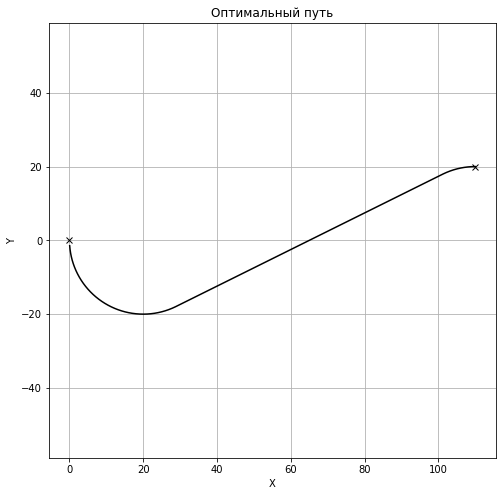

Оптимальное время:  255.57 сек


In [43]:
# Граничные точки задачи в формате:
# [x, y, theta (в градусах)]


pt0 = [110,20,180]
ptf = [0,0,90]

curvature = 0.05

param, T = calcPath(pt0, ptf, curvature)
path = scheme_traj(param)

fig = plt.figure(figsize=(8,8))

plt.plot(pt0[0],pt0[1],'kx')
plt.plot(ptf[0],ptf[1],'kx')
plt.plot(path[:,0],path[:,1],'k')
plt.grid(True)
plt.axis("equal")
plt.title('Оптимальный путь')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()
print('Оптимальное время: ', round(T*param.turn_radius,2),'сек')

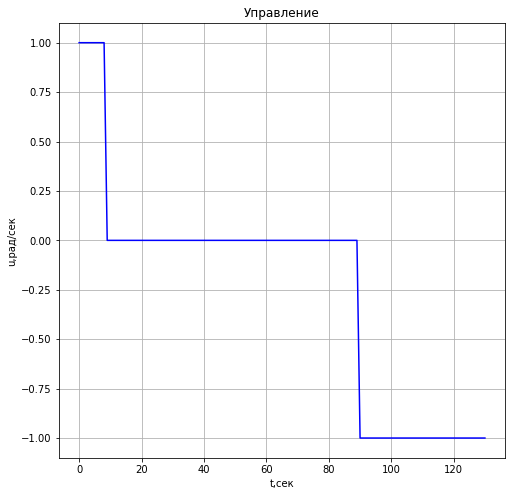

In [44]:
U = []
for symb in param.type.name:
    if symb == 'R':
        U.append(-1)
    if symb == 'L':
        U.append(1)
    if symb == 'S':
        U.append(0)

u = np.array([])
for i in range(3):
    u_i = U[i]*np.ones(round(param.seg_final[i] * param.turn_radius))
    u = np.append(u,u_i)
  
fig = plt.figure(figsize=(8,8))
       
plt.plot(np.linspace(0,len(u)-1,len(u)),u,'b-')
plt.grid(True)
plt.title('Управление')
plt.xlabel('t,сек')
plt.ylabel('u,рад/сек')

plt.show()
